# Ejercicio 3 - Temática Libre

#### Se pide llegar al análisis estadístico básico. No se pretende hacer un estudio estadístico inferencias avanzado sino un estudio exploratorio que muestre hallazgos interesantes en el dataset.

# Análisis de partidos de fútbol

Vamos a realizar un análisis de los partidos de fútbol que se han jugado durante los últimos 10 años en España. Nos vamos a centrar únicamente en la Primera División.

Los datos los descargamos de la siguiente web: http://www.football-data.co.uk/spainm.php

El dataset contiene los siguientes datos:
* Resultados a mitad y al final de cada partido.
* Estadísticas propias del partido.
* Datos de las casas de apuestas principales para cada partido.

No obstante se pueden consultar cada uno de los campos del dataset en el siguiente enlace: http://www.football-data.co.uk/notes.txt

### Cargamos las librerías necesarias y el dataset para realizar el análisis:

In [210]:
import glob
from os.path import basename
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Para este análisis nos vamos a centrar en los datos finales de cada partido, eliminando las columnas que tienen que ver con apuestas.

Como los datos vienen separados por temporada, juntamos los dataset en un único dataframe que será el que utilizaremos para el análisis.

In [3]:
# Leemos el directorio donde se encuentran todas las temporadas
allFiles = glob.glob("data/*.csv")
data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    #Añadimos la temporada a la que corresponde el partido
    df.insert(1, 'Season', basename(file_)[0:9])
    # Eliminamos las columnas de apuestas
    list_.append(df.iloc[:,0:23])
    # Añadimos el dataset al dataframe final
    data = pd.concat(list_)

#Transformamos la fecha a un formato legible
data.Date = pd.to_datetime(data.Date, format='%d/%m/%y')

# El dataframe nos queda de la siguiente forma
data = data.reset_index().drop('index', axis=1)

data.head(5)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,2006-2007,2006-08-26,Valencia,Betis,2,1,H,1,0,...,4,5,18,26,5,6,3,3,0,0
1,SP1,2006-2007,2006-08-27,Ath Bilbao,Sociedad,1,1,D,1,0,...,2,4,19,23,4,2,2,4,0,0
2,SP1,2006-2007,2006-08-27,Espanol,Gimnastic,0,1,A,0,0,...,6,7,25,27,6,7,2,3,0,0
3,SP1,2006-2007,2006-08-27,La Coruna,Zaragoza,3,2,H,2,1,...,6,6,22,19,1,6,4,4,0,1
4,SP1,2006-2007,2006-08-27,Osasuna,Getafe,0,2,A,0,0,...,7,2,26,22,6,1,5,4,0,0


### Descripción de los campos

Results Data
+ Div = League Division
+ Date = Match Date (dd/mm/yy)
+ HomeTeam = Home Team
+ AwayTeam = Away Team
+ FTHG = Full Time Home Team Goals
+ FTAG = Full Time Away Team Goals
+ FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
+ HTHG = Half Time Home Team Goals
+ HTAG = Half Time Away Team Goals
+ HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
+ HS = Home Team Shots
+ AS = Away Team Shots
+ HST = Home Team Shots on Target
+ AST = Away Team Shots on Target
+ HHW = Home Team Hit Woodwork
+ AHW = Away Team Hit Woodwork
+ HC = Home Team Corners
+ AC = Away Team Corners
+ HF = Home Team Fouls Committed
+ AF = Away Team Fouls Committed
+ HO = Home Team Offsides
+ AO = Away Team Offsides
+ HY = Home Team Yellow Cards
+ AY = Away Team Yellow Cards
+ HR = Home Team Red Cards
+ AR = Away Team Red Cards

### Echamos un rápido vistazo a los datos de los que disponemos

Buscamos si hay algún dato nulo

In [4]:
data.isnull().any()

Div         False
Season      False
Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
HS          False
AS          False
HST         False
AST         False
HF          False
AF          False
HC          False
AC          False
HY          False
AY          False
HR          False
AR          False
dtype: bool

Vemos de cuántos partidos disponemos para realizar el análisis

In [5]:
print 'Número de partidos disponibles:',len(data)

Número de partidos disponibles: 3800


Vemos una rápida descripción de los campos numéricos que tenemos disponibles

In [6]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.596316,1.133947,0.714211,0.500526,14.052632,11.121842,5.106053,3.904474,15.432895,15.256579,6.025263,4.534474,2.440000,2.731316,0.150789,0.195263
std,1.362332,1.154642,0.874853,0.718279,5.084272,4.546985,2.708544,2.286663,4.832735,4.798955,2.993174,2.571304,1.463635,1.494807,0.390934,0.451698
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,12.000000,12.000000,4.000000,3.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,15.000000,15.000000,6.000000,4.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,5.000000,19.000000,18.000000,8.000000,6.000000,3.000000,4.000000,0.000000,0.000000
max,10.000000,8.000000,6.000000,5.000000,37.000000,39.000000,18.000000,16.000000,35.000000,36.000000,20.000000,17.000000,8.000000,9.000000,3.000000,4.000000


De esta primera rápida descripción podemos obtener:
+ El equipo local marca más goles de media que el equipo visitante.
+ El equipo local dispara más veces, y más veces a portería, de media que el equipo visitante.

### Análisis Local vs Visitante

Primero, podemos ver una distribución acerca del lado que suele salir victorioso en el partido

(0, 300)

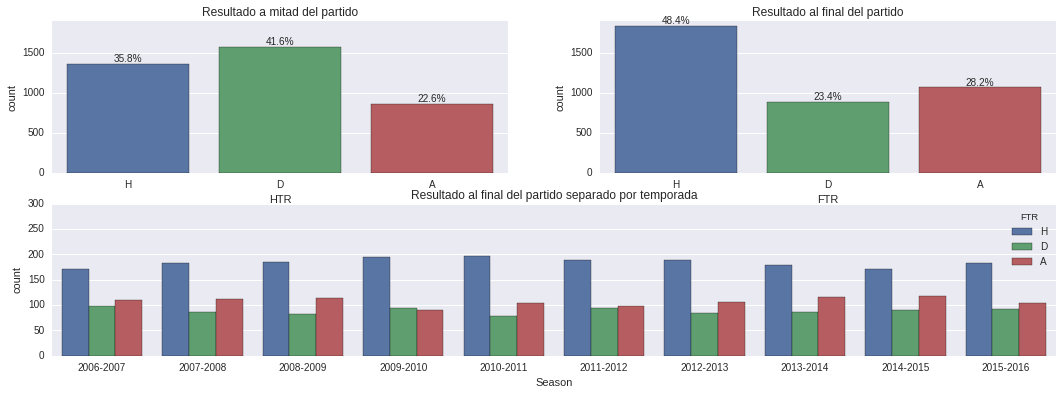

In [7]:
# Especificamos los datos de los gráficos
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# Vamos a poner juntos quién va ganando a mitad de partido y quién gana
ax = plt.subplot2grid((2,2),(0,0))
ax = sns.countplot(x="HTR", data=data, order=['H', 'D', 'A'])
plt.title("Resultado a mitad del partido")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.set_ylim(0,len(data)/2)


ax = plt.subplot2grid((2,2),(0,1))
ax = sns.countplot(x="FTR", data=data, order=['H', 'D', 'A'])
plt.title("Resultado al final del partido")    
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.set_ylim(0,len(data)/2)

# Vemos los resultados finales separados por cada temporada
ax = plt.subplot2grid((2,2),(1,0), colspan=2)
ax = sns.countplot(x="Season", hue="FTR", data=data);
plt.title("Resultado al final del partido separado por temporada")
ax.set_ylim(0,300)

Observamos que cerca de la mitad de los partidos llegan al descanso con empate y, al final del partido, cerca de la mitad de las veces ganan los locales.

También podemos observar la efectividad de los equipos según el campo en el que juegan. Entendemos efectividad por la cantidad de tiros que son necesarios para anotar un gol.

In [8]:
def calcAccuracyHome(row):
    if row['HS'] == 0:
        return float(0)
    else:
        return float(row['FTHG'])/float(row['HS'])

def calcAccuracyAway(row):
    if row['AS'] == 0:
        return float(0)
    else:
        return float(row['FTAG'])/float(row['AS'])

data['AccuracyHome'] = data.apply(calcAccuracyHome, axis=1)
data['AccuracyAway'] = data.apply(calcAccuracyAway, axis=1)

¿En qué campo los equipos son más efectivos?

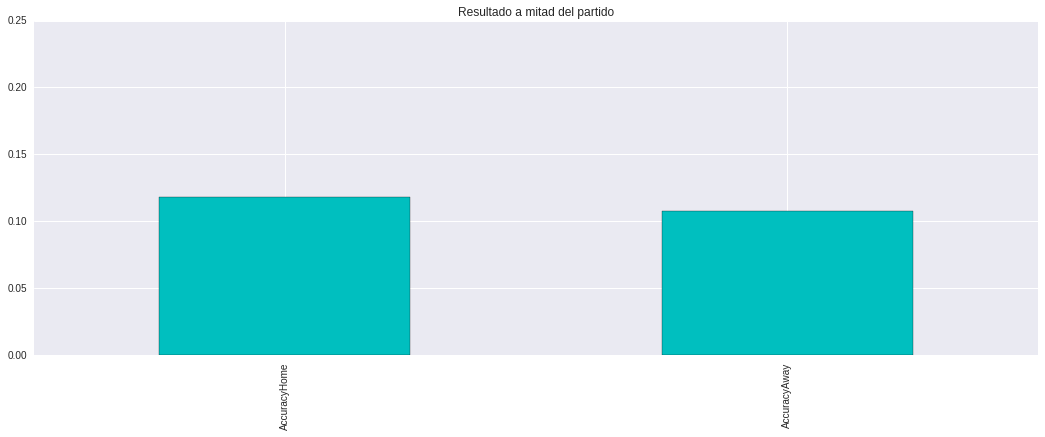

In [19]:
# Especificamos los datos de los gráficos
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# Vemos la efectividad media de los equipos que juegan como locales y los equipos que juegan como visitantes
ax = data[['AccuracyHome','AccuracyAway']].mean().plot(kind='bar', color='c')
ax.set_ylim(0,0.25)
plt.title("Resultado a mitad del partido")


Según observamos, el campo en el que juega un equipo no influye a la hora de valorar su efectividad.

### Análisis de equipos

Lo primero que vamos a hacer es ver qué equipos han participado en la Primera División durante los últimos 10 años. Como todas las temporadas tienen partidos de ida y vuelta, todos los equipos han debido jugar como local al menos una vez.

In [10]:
# Cogemos todos los equipos que han jugado como locales y eliminamos los duplicados y agrupamos por temporada
teams_season = data[['Season', 'HomeTeam']].drop_duplicates()

#Estos son los equipos que han jugado en primera división durante los últimos 10 años.
teams_season = teams_season.set_index(['Season', 'HomeTeam'])

Guardamos el rendimiento de cada equipo en Primera División por temporada.

In [224]:
teams_season.loc[:,'WinHome'] = 0
teams_season.loc[:,'DrawHome'] = 0
teams_season.loc[:,'LoseHome'] = 0
teams_season.loc[:,'WinAway'] = 0
teams_season.loc[:,'DrawAway'] = 0
teams_season.loc[:,'LoseAway'] = 0
teams_season.loc[:,'GoalsHome'] = 0
teams_season.loc[:,'GoalsAway'] = 0
teams_season.loc[:,'GReceivedHome'] = 0
teams_season.loc[:,'GReceivedAway'] = 0
teams_season.loc[:,'HomeShots'] = 0
teams_season.loc[:,'AwayShots'] = 0

for team in teams_season.index:
    # Separamos los partidos jugados dentro de casa de los jugados fuera
    matches_home = data[(data['HomeTeam']==team[1]) & (data['Season']==team[0])]
    matches_away = data[(data['AwayTeam']==team[1]) & (data['Season']==team[0])]
    # Anotamos las victorias
    teams_season.loc[team, 'WinHome'] = len(matches_home[matches_home['FTHG']>matches_home['FTAG']])
    teams_season.loc[team, 'WinAway'] = len(matches_away[matches_away['FTAG']>matches_away['FTHG']])
    # Anotamos los empates
    teams_season.loc[team, 'DrawHome'] = len(matches_home[matches_home['FTHG']==matches_home['FTAG']])
    teams_season.loc[team, 'DrawAway'] = len(matches_away[matches_away['FTAG']==matches_away['FTHG']])
    # Anotamos las derrotas
    teams_season.loc[team, 'LoseHome'] = len(matches_home[matches_home['FTHG']<matches_home['FTAG']])
    teams_season.loc[team, 'LoseAway'] = len(matches_away[matches_away['FTAG']<matches_away['FTHG']])
    # Vemos cuántos goles han anotado
    teams_season.loc[team, 'GoalsHome'] = matches_home['FTHG'].sum()
    teams_season.loc[team, 'GReceivedHome'] = matches_home['FTAG'].sum()
    teams_season.loc[team, 'GoalsAway'] = matches_away['FTAG'].sum()
    teams_season.loc[team, 'GReceivedAway'] = matches_away['FTHG'].sum()
    # Anotamos la eficiencia respecto a la cantidad de disparos realizados
    teams_season.loc[team, 'HomeShots'] = matches_home['HS'].sum()
    teams_season.loc[team, 'AwayShots'] = matches_away['AS'].sum()
    
# Anotamos los puntos conseguidos en dicha temporada
teams_season.loc[:, 'Points']=3*(teams_season['WinHome']+teams_season['WinAway']) + (teams_season['DrawHome']+teams_season['DrawAway'])

teams_season.head(5)

WinHome  DrawHome  LoseHome  WinAway  DrawAway  \
Season    HomeTeam                                                     
2006-2007 Valencia         14         2         3        6         4   
          Ath Bilbao        6         4         9        4         6   
          Espanol           7         6         6        5         7   
          La Coruna         9         4         6        3         7   
          Osasuna           6         6         7        7         1   

                      LoseAway  GoalsHome  GoalsAway  GReceivedHome  \
Season    HomeTeam                                                    
2006-2007 Valencia           9         40         17             16   
          Ath Bilbao         9         19         25             28   
          Espanol            7         26         20             27   
          La Coruna          9         19         13             16   
          Osasuna           11         26         25             24   

                      GReceivedAway  HomeShots  AwayShots  SeasonsInARow  \
Season    HomeTeam                                                         
2006-2007 Valencia               26        252        188            1.0   
          Ath Bilbao             34        223        194            1.0   
          Espanol                26        240        166            1.0   
          La Coruna              29        259        210            1.0   
          Osasuna                25        277        188            1.0   

                      Points  
Season    HomeTeam            
2006-2007 Valencia        66  
          Ath Bilbao      40  
          Espanol         49  
          La Coruna       47  
          Osasuna         46

Si agrupamos por equipo, tenemos las estadísticas de las últimas 10 temporadas por equipo.

In [12]:
teams_total = teams_season.reset_index().drop(['Season'], axis=1)
teams_total = teams_total.groupby('HomeTeam').sum()
teams_total.head(5)

,WinHome,DrawHome,LoseHome,WinAway,DrawAway,LoseAway,GoalsHome,GoalsAway,GReceivedHome,GReceivedAway,HomeShots,AwayShots
HomeTeam,,,,,,,,,,,,
Almeria,40,38,36,22,18,74,139,105,151,215,1399,1141
Ath Bilbao,93,43,54,52,49,89,291,208,218,299,2609,2050
Ath Madrid,123,32,35,80,43,67,386,250,170,237,2966,2311
Barcelona,159,19,12,116,44,30,582,421,125,183,3244,2781
Betis,42,42,49,34,32,67,160,146,170,230,1861,1428


Vamos a hacer algunas gráficas que nos ayuden a comprender los datos.

Para ello, vamos a añadir algunos campos al dataframe que nos van a ayudar al análisis:
+ Puntos: es la mejor forma de entender el rendimiento del equipo.
+ Goles: suma de los goles conseguidos.
+ Tiros: suma de los tiros realizados.
+ Eficiencia: cantidad de tiros que necesita el equipo para lograr un gol.

In [137]:
# Creamos un dataframe auxiliar que nos va a ayudar a dibujar los datos que queremos
aux = pd.DataFrame(index=teams_total.index, columns=None)

aux.loc[:,'Points'] = 3*(teams_total['WinHome']+teams_total['WinAway'])+1*(teams_total['DrawHome']+teams_total['DrawAway'])
aux.loc[:,'Wins'] = teams_total['WinHome']+teams_total['WinAway']
aux.loc[:,'Goals'] = teams_total['GoalsHome']+teams_total['GoalsAway']
aux.loc[:,'GoalsReceived'] = teams_total['GReceivedHome']+teams_total['GReceivedAway']
aux.loc[:,'Shots'] = teams_total['HomeShots']+teams_total['AwayShots']
aux.loc[:,'Accuracy'] = aux['Goals']/aux['Shots']

Vamos a graficar los datos.

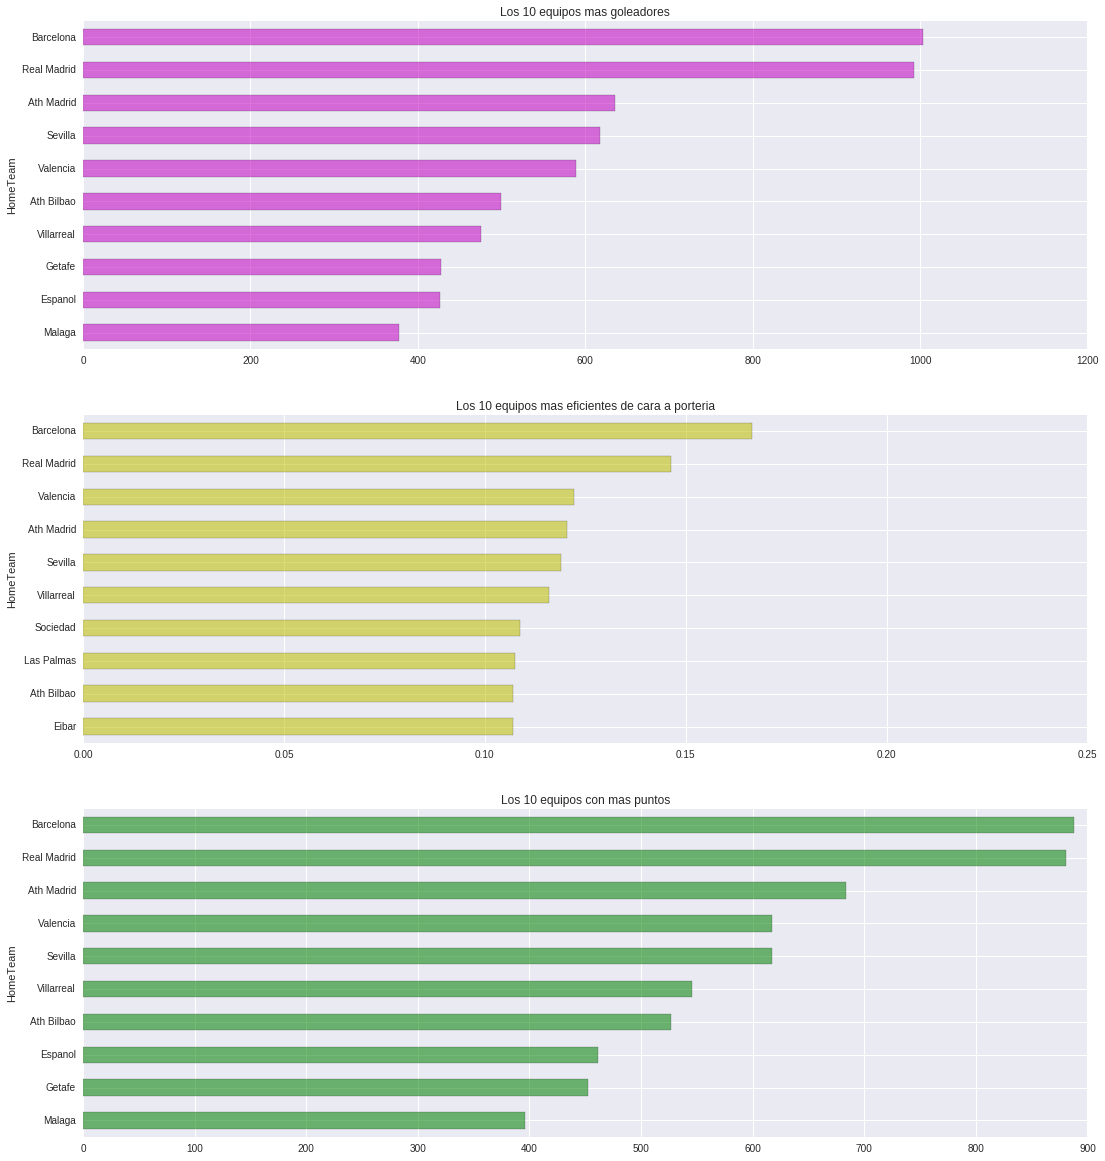

In [138]:
# Especificamos los datos de los gráficos
fig = plt.figure(figsize=(18,20)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55


# Máximos anotadores
ax = plt.subplot2grid((3,1),(0,0))
aux_sort = aux.sort_values('Goals')
ax = aux_sort['Goals'].tail(10).plot(kind='barh', title="Los 10 equipos mas goleadores", color='m', alpha=0.55)


# Más eficientes
ax = plt.subplot2grid((3,1),(1,0))
aux_sort = aux.sort_values('Accuracy')
ax = aux_sort['Accuracy'].tail(10).plot(kind='barh', xlim=(0,0.25), color='y',
                                        title="Los 10 equipos mas eficientes de cara a porteria", alpha=0.55)

# Más puntos conseguidos
ax = plt.subplot2grid((3,1),(2,0))
aux_sort = aux.sort_values('Points')
ax = aux_sort['Points'].tail(10).plot(kind='barh', title="Los 10 equipos con mas puntos", color='g', alpha=0.55)

Como podemos observar, parece que hay una relación entre el número de goles anotados y la cantidad de puntos conseguidos por un equipo. Vamos a comprobar esta afirmación.

In [69]:
# Matriz de correlación
aux.corr()

,Points,Wins,Goals,GoalsReceived,Shots,Accuracy
Points,1.000000,0.995430,0.990650,0.754524,0.976893,0.782627
Wins,0.995430,1.000000,0.995770,0.695124,0.956907,0.814276
Goals,0.990650,0.995770,1.000000,0.691555,0.955806,0.821125
GoalsReceived,0.754524,0.695124,0.691555,1.000000,0.864060,0.333803
Shots,0.976893,0.956907,0.955806,0.864060,1.000000,0.674434
Accuracy,0.782627,0.814276,0.821125,0.333803,0.674434,1.000000


De esta forma es más complicado de leer. Vamos a visualizarlo de forma gráfica.

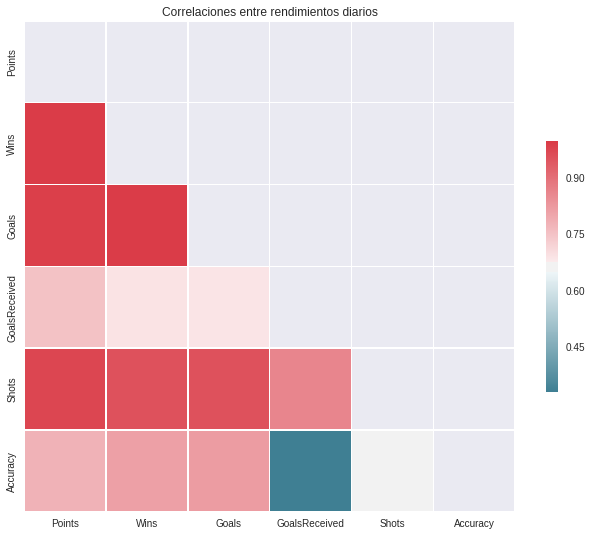

In [74]:
data_corr = aux.corr()
# Ocultar un el triángulo superior de la diagonal
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Crear el área del gráfico
f, ax = plt.subplots(figsize=(11, 9))
sns.plt.title('Correlaciones entre rendimientos diarios')

# Crear la paleta de color
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujar el mapa de calor. 
sns.heatmap(data_corr, mask=mask, cmap=cmap, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Vemos que, efectivamente, existe una fuerte correlación entre los puntos conseguidos y la cantidad de goles anotados. 

Asimismo, podemos ver que también hay relación entre la cantidad de disparos realizados con la cantidad de puntos conseguidos.

Vamos a verlo gráficamente.

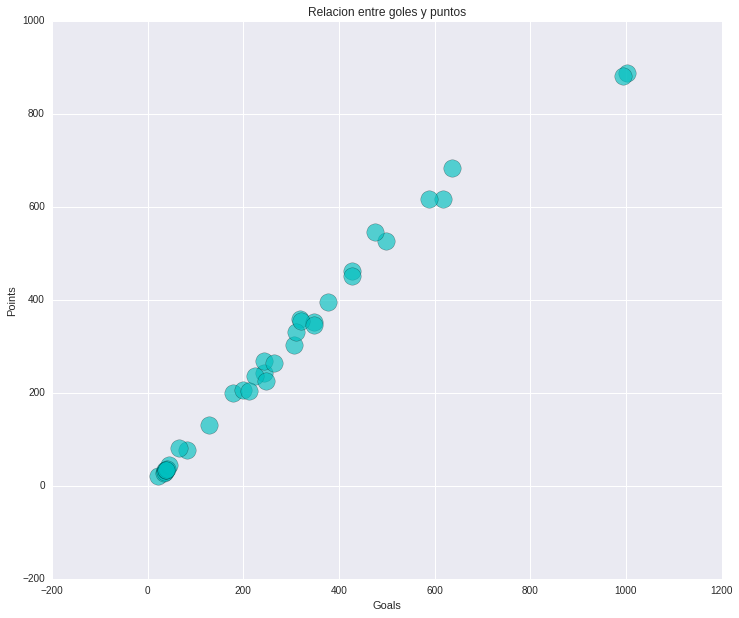

In [134]:
# Relación entre goles y puntos
ax = aux.plot.scatter(x='Goals', y='Points', s=300, alpha=0.65, figsize=(12,10),
                title='Relacion entre goles y puntos', c='c')

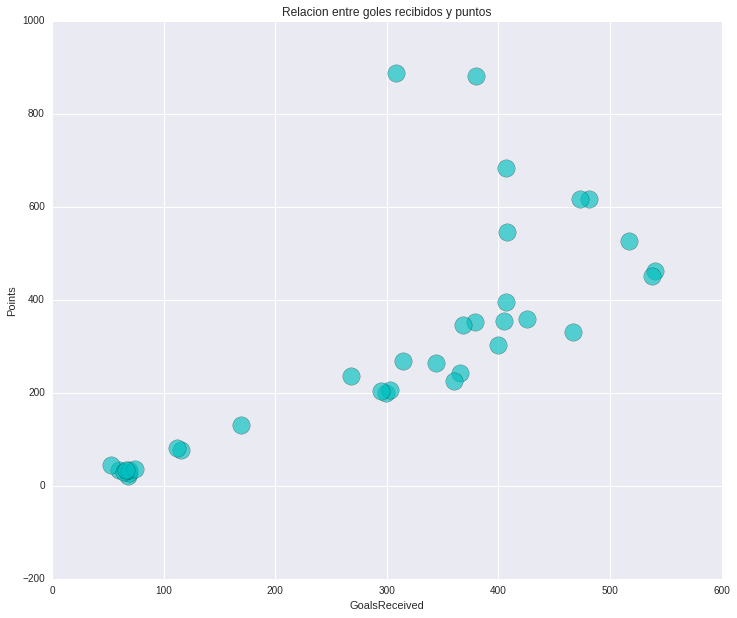

In [154]:
# Relación entre goles recibidos y puntos
ax = aux.plot.scatter(x='GoalsReceived', y='Points', s=300, alpha=0.65, figsize=(12,10),
                title='Relacion entre goles recibidos y puntos', c='c')

Vemos que hay una relación casi directa entre el número de goles anotados y la cantidad de puntos conseguidos. No obstante, no hay mucha relación entre los puntos con los goles recibidos.

Así, podemos inferir que para conseguir puntos no es tan importante recibir goles como anotarlos.

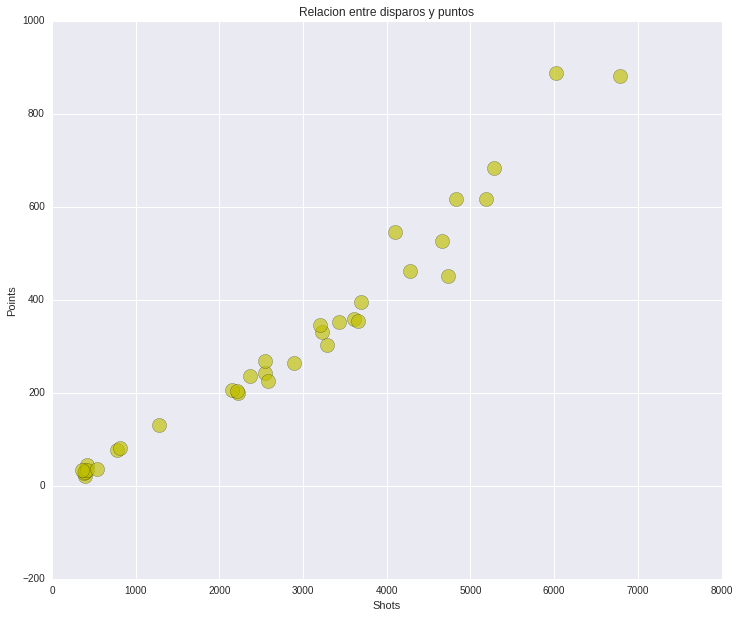

In [159]:
# Relación entre eficiencia y puntos
ax = aux.plot.scatter(x='Shots', y='Points', s=200, alpha=0.65, figsize=(12,10), c='y',
                title='Relacion entre disparos y puntos')

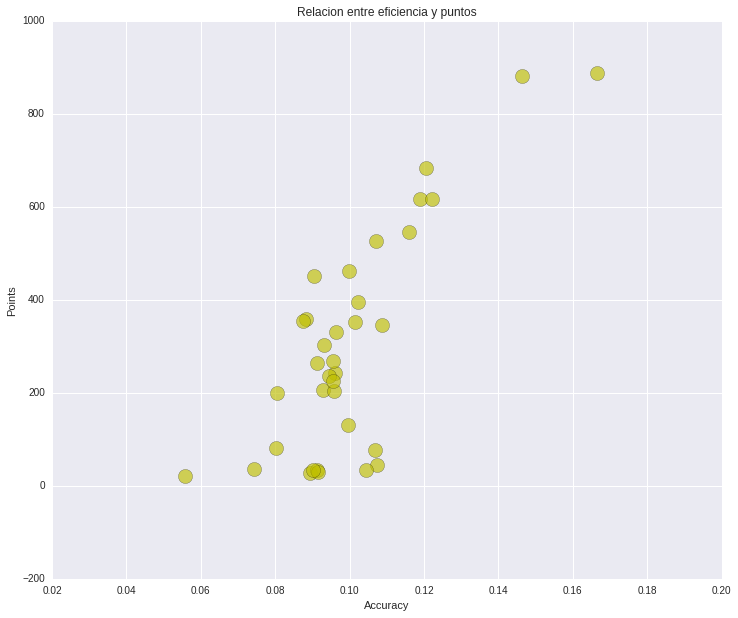

In [161]:
# Relación entre eficiencia y puntos
ax = aux.plot.scatter(x='Accuracy', y='Points', s=200, alpha=0.65, figsize=(12,10), c='y',
                title='Relacion entre eficiencia y puntos')

Vemos que hay una relación casi directa entre el número de disparos y la cantidad de puntos. No obstante, no vemos tanta relación con la eficiencia de esos disparos.

### Regresión lineal

Vamos a aplicar una regresión lineal a las variables definidas anteriormente. Estimamos los puntos conseguidos a través de la cantidad de goles anotados.

In [206]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# utilizando la api de formula de statsmodels
est = smf.ols(formula='Points ~ Goals', data=aux).fit()
est.summary() 
# Points se estima en base a Goals.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 14 Nov 2016   Prob (F-statistic):           3.94e-30
Time:                        20:56:59   Log-Likelihood:                -171.23
No. Observations:                  35   AIC:                             346.5
Df Residuals:                      33   BIC:                             349.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.4750      8.784      2.103      0.043         0.603    36.347
Goals          0.9508      0.023     41.713      0.000         0.904     0.997
==============================================================================
Omnibus:                        3.089   Durbin-Watson:                   2.558
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.952
Skew:                          -0.265   Prob(JB):                        0.377
Kurtosis:                       4.029   Cond. No.                         603.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análisis de temporadas consecutivas

Hasta ahora hemos analizado cómo afecta al resultado de un partido el campo en el que se juega. También, hemos analizado cómo afectan a los puntos conseguidos la cantidad de goles anotados, eficiencia de cara a portería o los disparos realizados.

En este punto, queremos analizar si el número de temporadas que lleva un equipo en Primera División afecta a sus posibilidades de ganar puntos que le permitan estar un año más entre los mejores equipos.

(Vamos a suponer que la liga empezó en la temporada 2006-2007 y que todos los equipos acaban de llegar a Primera División)

In [225]:
# Creamos un dataframe auxiliar
aux2 = teams_season.reset_index()

# Añadimos un atributo que nos indique el número de temporadas consecutivas que lleva el equipo en Primera.
for team in aux2['HomeTeam'].drop_duplicates():
    seasonsConsecutive = 0
    for season in aux2['Season'].drop_duplicates():
        if team in aux2[aux2.Season==season]['HomeTeam'].tolist():
            seasonsConsecutive = seasonsConsecutive + 1
            teams_season.loc[(season,team),'SeasonsInARow']=seasonsConsecutive
        else:
            seasonsConsecutive = 0

teams_season['SeasonsInARow'].tail(5)

#aux2[aux2.Season==season]['HomeTeam']
#for season in seasons['Season']:
#    seasons[]
#seasons[seasons.Season=='2006-2007']['HomeTeam']

Season     HomeTeam  
2015-2016  Eibar          2.0
           Getafe        10.0
           Las Palmas     1.0
           Sevilla       10.0
           Valencia      10.0
Name: SeasonsInARow, dtype: float64

Vemos si existe alguna relación entre los años que un equipo está en Primera División y la cantidad de puntos conseguidos.

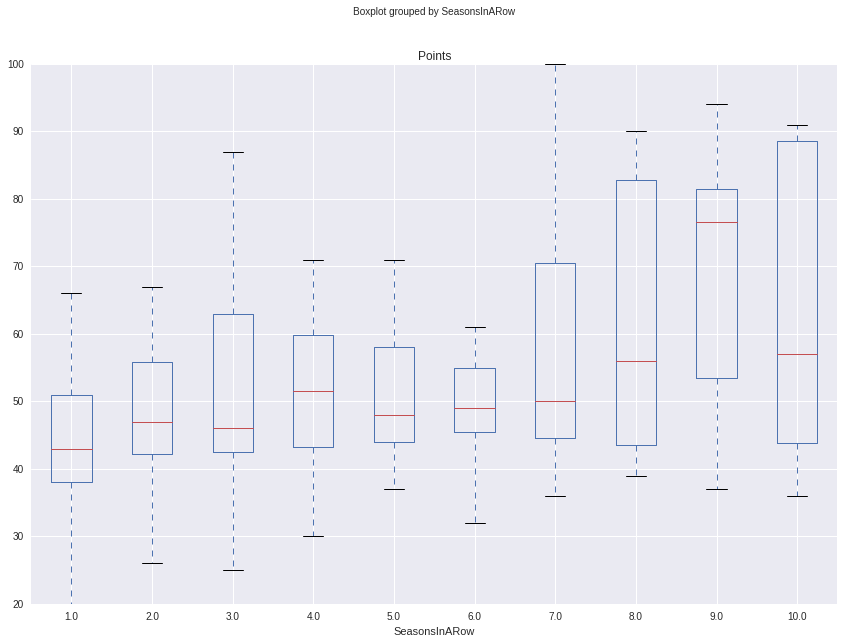

In [233]:
ax = teams_season.boxplot(column='Points', by='SeasonsInARow', figsize=(14,10))

Podemos ver que los equipos, en su primera temporada en Primera División, tienden a conseguir entre 38 y 50 puntos, quedándose en la parte baja de la clasificación.

Como se dice siempre en el fútbol, damos por hecho que se necesitan 42 puntos en una temporada para asegurar la permanencia en Primera División. Así, vemos que una vez pasada la primera temporada, las posibilidades de no descender se incrementan (habiendo siempre excepciones).

A todo esto, tenemos que tener en cuenta que hemos partido de la premisa de que todos los equipos empezaron en Primera División en 2006, cuando eso no es así. Por lo tanto, la media de las primeras temporadas en Primera División estaría más cerca del descenso.